

# Project: Investigate a Dataset - [tmdb-movies]



<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
#### Best Directors With Highest Revenues and Vote Rates
#### Best Production Companies
#### Relationship Between Budget and Revenues
#### Relationship Between Genres and Profits
#### Quantity of Movies Through the Years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Checking For Types, Missing Values, or Duplicates

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### There're some columns I don't need it for analysis, so I'll drop them

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### There're some missing values in zeros not null in budget and revenues, budget_adj and revenue_adj 

In [7]:
df.duplicated().sum()

1

In [8]:
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

#### Null values are within the dataset.


### Data Cleaning


#### I'll start with dropping the columns I don't need to.

In [3]:
df.drop(['imdb_id','homepage','tagline','overview','id','cast','runtime','keywords'], axis=1, inplace=True)

In [4]:
df.drop(['popularity','revenue','budget','release_date'], axis=1, inplace=True)

#### I dropped revenue and budget columns because I'll use revenue_adj and budget_adj instead to provide fair comparison through different years.

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum().sum()

0

#### I dropped duplicates and null values then rechecking 

In [7]:
df = df.replace(0, np.nan)

In [19]:
df.isnull().sum()

original_title             0
director                   0
genres                     0
production_companies       0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4777
revenue_adj             5054
dtype: int64

In [20]:
df.dropna(inplace=True)

#### I converted the zero values into null so I can drop them, I dropped instead of filling with the mean because there was large number of missing data so it will affect the analysis process if I fill it with the mean. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Best Directors With Highest Revenues and Vote Rates!)

In [8]:
vote_proportion = df['vote_average']*df['vote_count']
df['vote_rate'] = vote_proportion/1000

#### I want to use both vote average and vote count so I created a new column using both to get more appropriate evaluation for the vote rates, I also divided it by 1000 to get more relevant estimation. 

In [9]:
directors_vote = df.sort_values(by='vote_rate', ascending=False)

In [10]:
directors_vote.head(1)

,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate
1919,Inception,Christopher Nolan,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,9767,7.9,2010,160000000.0,825500000.0,77.1593


#### Sorting the dataset acc to vote rate 

In [11]:
directors_vote = directors_vote.iloc[:, np.r_[1:2, -1]]
directors_vote.head(1)

,director,vote_rate
1919,Christopher Nolan,77.1593


#### Selecting only the two columns regarding directors and vote rates

In [12]:
top_director_vote = directors_vote.iloc[:13]
top_director_vote

,director,vote_rate
1919,Christopher Nolan,77.1593
2875,Christopher Nolan,68.2992
4361,Joss Whedon,64.9919
1386,James Cameron,60.0518
4364,Quentin Tarantino,56.7875
629,Christopher Nolan,51.9840
4363,Christopher Nolan,50.4225
2410,Lilly Wachowski|Lana Wachowski,49.5378
4178,Frank Darabont,48.3336
2409,David Fincher,47.9763


In [14]:
def bar_chart(x, y, c):
    plt.subplots(figsize=(8, 4))
    plt.bar(c[x], c[y])
    plt.rcParams['xtick.labelsize'] = 14
    plt.xticks(rotation = 90)
    plt.title('Best Directors Acc to {}'.format(y.title()), size=16)
    plt.xlabel('Director', size=12)
    plt.ylabel('{}'.format(y.title()), size=12); 
    

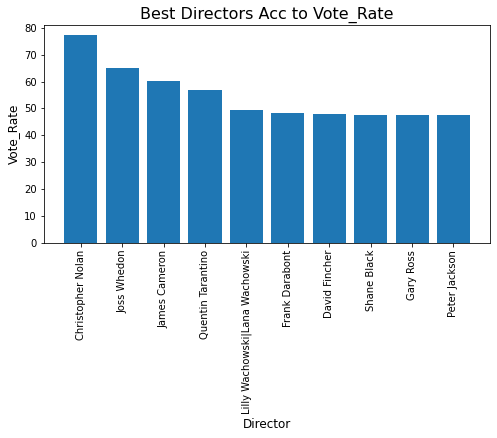

In [15]:
bar_chart('director', 'vote_rate', top_director_vote)

### So this bar shows best 10 directors acc to vote reviews.

In [17]:
directors_revenue = df.sort_values(by='revenue_adj', ascending=False)
directors_revenue.head(1)

,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate
1386,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09,60.0518


In [18]:
directors_revenue = directors_revenue.iloc[:, np.r_[1:2, -2]]
top_director_revenue = directors_revenue.iloc[:13]
top_director_revenue

,director,revenue_adj
1386,James Cameron,2.827124e+09
1329,George Lucas,2.789712e+09
5231,James Cameron,2.506406e+09
10594,William Friedkin,2.167325e+09
9806,Steven Spielberg,1.907006e+09
3,J.J. Abrams,1.902723e+09
8889,Steven Spielberg,1.791694e+09
8094,Irwin Winkler,1.583050e+09
10110,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,1.574815e+09
4361,Joss Whedon,1.443191e+09


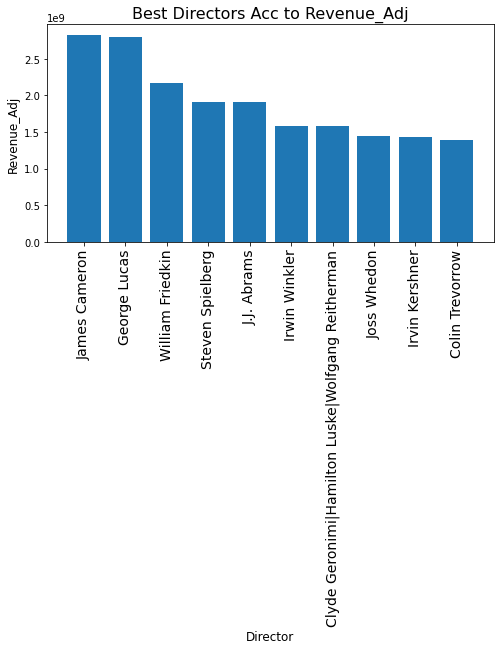

In [19]:
bar_chart('director', 'revenue_adj', top_director_revenue)

#### Conclusion: Christopher Nolan has the highes vote rate and James Cameron has the highest revenue

### Research Question 2  (Best Production Companies)

In [20]:
profits = df['revenue_adj'] - df['budget_adj']
df['profits'] = profits
df.head(1)

,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate,profits
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,36.153,1.254446e+09


#### I added a new column to demonstrate profits, as it's a better indicator of how successful the movie was regarding the financial aspect.

In [21]:
df["production_companies"] = df["production_companies"].apply(lambda x: x.replace("|", "-"))

In [22]:
df.head(1)

,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate,profits
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios-Amblin Entertainment-Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,36.153,1.254446e+09


In [23]:
split_company = df['production_companies'].str.split('-', expand=True)
split_company.head(2)

,0,1,2,3,4,5,6,7,8
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,None,None,None,None
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None,None,None,None,None


#### I splitted the companies to several columns so I can work with each one individually.

In [24]:
objs = [df, split_company]
df_companies = pd.concat(
    objs,
    axis=1,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True)

In [25]:
df_companies.head(3)

,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate,profits,0,1,2,3,4,5,6,7,8
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios-Amblin Entertainment-Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,36.1530,1.254446e+09,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,None,None,None,None
1,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures-Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,43.9135,2.101614e+08,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None,None,None,None,None
2,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment-Mandeville Films-Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,15.6240,1.704191e+08,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None,None,None,None,None


In [26]:
comp_0 = df_companies.groupby(0, as_index=False).profits.sum()
comp_1 = df_companies.groupby(1, as_index=False).profits.sum()
comp_2 = df_companies.groupby(2, as_index=False).profits.sum()
comp_3 = df_companies.groupby(3, as_index=False).profits.sum()
comp_4 = df_companies.groupby(4, as_index=False).profits.sum()
comp_5 = df_companies.groupby(5, as_index=False).profits.sum()
comp_6 = df_companies.groupby(6, as_index=False).profits.sum()

In [27]:
companies = [comp_0, comp_1, comp_2, comp_3, comp_4, comp_5, comp_6]
rename = ['Production_company', 'profits']
new_companies = []
for i in companies :
    i.columns = rename
comp_0.head(2)    

,Production_company,profits
0,10th Hole Productions,-4.376180e+06
1,120dB Films,1.334861e+03


In [28]:
top_comp = pd.concat(
    companies,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True)

In [29]:
top_comp.head()

,Production_company,profits
0,10th Hole Productions,-4.376180e+06
1,120dB Films,1.334861e+03
2,1492 Pictures,2.831008e+09
3,1818,1.583448e+07
4,185 Trax,0.000000e+00


#### I organized the dataset acc to company's name and its profits in separate dataframe, renamed the columns name so I can merge them, then reorganize them again and sort it by profits to select the top production companies

In [30]:
top_comp = top_comp.groupby('Production_company',as_index=False).profits.sum()

In [31]:
top_comp = top_comp.sort_values(by='profits', ascending=False)
top_comp20 = top_comp.iloc[:21]
top_comp20

,Production_company,profits
7722,Warner Bros.,4.392299e+10
7512,Universal Pictures,4.261918e+10
5410,Paramount Pictures,3.810520e+10
7397,Twentieth Century Fox Film Corporation,3.775190e+10
7707,Walt Disney Pictures,2.555429e+10
1645,Columbia Pictures,2.031701e+10
372,Amblin Entertainment,1.639077e+10
5015,New Line Cinema,1.591263e+10
3011,Goldwyn,1.347986e+10
4559,Mayer (MGM),1.344559e+10


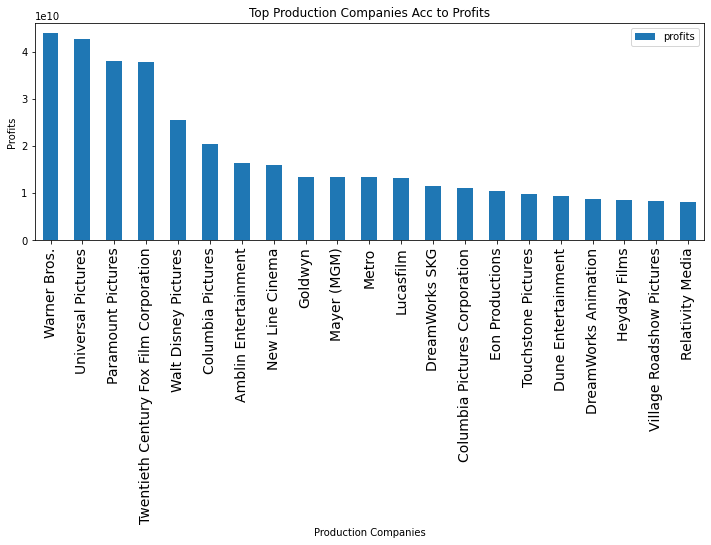

In [32]:
top_comp20.plot(x='Production_company', y='profits', kind='bar', figsize=(12,4))
plt.title('Top Production Companies Acc to Profits')
plt.xlabel('Production Companies')
plt.ylabel('Profits');

#### Conclusion: Warner Bros and Universal Pictures are the most production companies making profits acc to the dataset provided.

### Research Question 3  (Relationship Between Budget and Revenues)

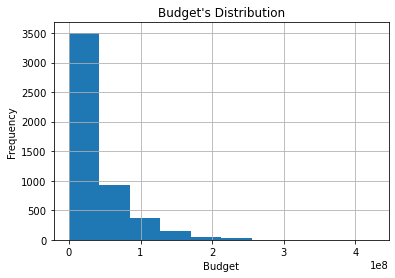

In [70]:
df.budget_adj.hist()
plt.title("Budget's Distribution")
plt.ylabel('Frequency')
plt.xlabel("Budget");

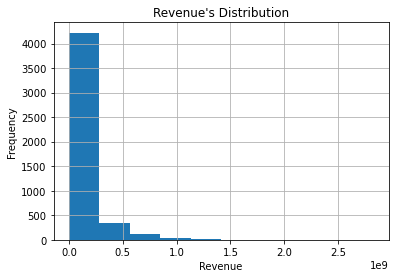

In [69]:
df.revenue_adj.hist()
plt.title("Revenue's Distribution")
plt.ylabel('Frequency')
plt.xlabel("Revenue");


#### Budget histogram is more skewed to the right than revenue histogram

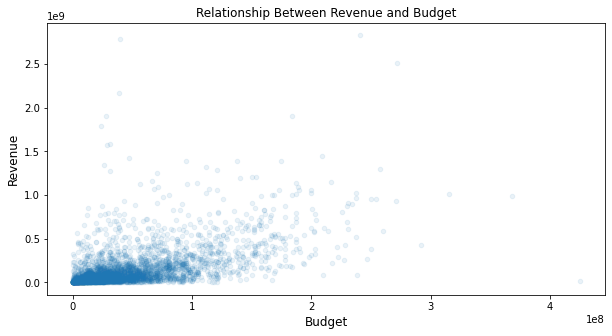

In [62]:
df.plot(x='budget_adj', y='revenue_adj', alpha=.09, kind='scatter', figsize=(10,5))
plt.title("Relationship Between Revenue and Budget")
plt.xlabel("Budget",size=12)
plt.ylabel("Revenue", size=12);

#### The scatter plot chart isn't demonstrating the relation enough, so I'll use a different approach.

In [101]:
df.describe()

,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate,profits
count,3807.000000,3807.000000,3807.000000,3.807000e+03,3.807000e+03,3807.000000,3.807000e+03
mean,533.886787,6.170239,2001.230890,4.469723e+07,1.386431e+08,3.567187,9.394584e+07
std,883.605159,0.792423,11.327031,4.488596e+07,2.169636e+08,6.394561,1.949944e+08
min,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,0.026400,-4.139124e+08
25%,74.000000,5.700000,1995.000000,1.354637e+07,1.919970e+07,0.422100,-1.421388e+06
50%,208.000000,6.200000,2004.000000,3.038360e+07,6.282247e+07,1.273600,2.849077e+07
75%,584.000000,6.700000,2010.000000,6.082825e+07,1.656493e+08,3.730500,1.089818e+08
max,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,77.159300,2.750137e+09


In [33]:
bin_edges = [9.693980e-01, 1.354637e+07, 3.038360e+07, 6.082825e+07, 4.250000e+08]
bin_names = ['low', 'medium', 'moderate_high', 'high']

In [34]:
df['budget_levels'] = pd.cut(df['budget_adj'], bin_edges, labels=bin_names)
df.head(1)

,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate,profits,budget_levels
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios-Amblin Entertainment-Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,36.153,1.254446e+09,high


#### I created a category for budget levels in a new column

In [35]:
budget_revenue_mean = df.groupby('budget_levels').revenue_adj.mean()

In [36]:
budget_revenue_mean

budget_levels
low              4.020454e+07
medium           7.912161e+07
moderate_high    1.313132e+08
high             3.041436e+08
Name: revenue_adj, dtype: float64

#### Grouping the budget levels acc to the revenues average

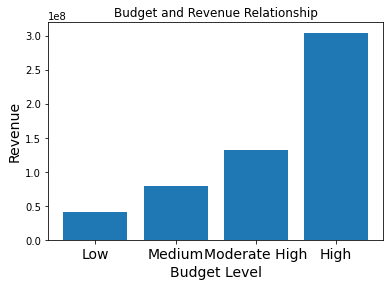

In [37]:
locations = [1,2,3,4]
heights = budget_revenue_mean 
labels = budget_revenue_mean.index.str.replace('_',' ').str.title()
plt.bar(locations, heights, tick_label=labels)
plt.rcParams['xtick.labelsize'] = 10
plt.title("Budget and Revenue Relationship")
plt.xlabel("Budget Level",size=14)
plt.ylabel("Revenue", size=14);

#### Conclusion: High budget level has the highest revenue average, and low budget has the lowest revenue average.

### Research Question 4  (Relationship Between Genres and Profits)

In [38]:
df["genres"] = df["genres"].apply(lambda x: x.replace("|", "-"))
df.head(2)

,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate,profits,budget_levels
0,Jurassic World,Colin Trevorrow,Action-Adventure-Science Fiction-Thriller,Universal Studios-Amblin Entertainment-Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,36.1530,1.254446e+09,high
1,Mad Max: Fury Road,George Miller,Action-Adventure-Science Fiction-Thriller,Village Roadshow Pictures-Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,43.9135,2.101614e+08,high


In [39]:
split_genres = df['genres'].str.split('-', expand=True)
split_genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


#### I splitted the genres  into different columns in a new dataframe and then merge it with the original dataset into a new one.

In [40]:
objs_1 = [df, split_genres]
genres_df = pd.concat(
    objs_1,
    axis=1,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True)

In [41]:
genres_df.head(2)

,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate,profits,budget_levels,0,1,2,3,4
0,Jurassic World,Colin Trevorrow,Action-Adventure-Science Fiction-Thriller,Universal Studios-Amblin Entertainment-Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,36.1530,1.254446e+09,high,Action,Adventure,Science Fiction,Thriller,None
1,Mad Max: Fury Road,George Miller,Action-Adventure-Science Fiction-Thriller,Village Roadshow Pictures-Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,43.9135,2.101614e+08,high,Action,Adventure,Science Fiction,Thriller,None


In [42]:
genres_1 = genres_df.groupby(1, as_index=False).profits.mean()
genres_0 = genres_df.groupby(0, as_index=False).profits.mean()
genres_2 = genres_df.groupby(2, as_index=False).profits.mean()
genres_3 = genres_df.groupby(3, as_index=False).profits.mean()
genres_4 = genres_df.groupby(4, as_index=False).profits.mean()

In [43]:
genres = [genres_0, genres_1, genres_2, genres_3, genres_4]
rename = ['genres', 'profits']
for i in genres:
    i.columns = rename

In [44]:
genres_4

,genres,profits
0,Action,4.773653e+08
1,Adventure,1.185445e+08
2,Animation,2.882206e+08
3,Comedy,1.853543e+08
4,Crime,8.714027e+07
5,Drama,6.244515e+07
6,Family,1.868650e+08
7,Fantasy,2.554243e+08
8,Foreign,NaN
9,History,-5.012925e+05


#### Grouped the genres of every genre column acc to profits average into a separate dataframe, then united the names of the two columns for the dataframes so I can merge them to extract the data.

In [45]:
genres_profits = pd.concat(
    genres,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True)

In [46]:
genres_profits = genres_profits.groupby('genres',as_index=False).profits.mean()
genres_profits = genres_profits.sort_values(by='profits', ascending=False)
top_genres_profits = genres_profits.iloc[:11]
top_genres_profits

,genres,profits
2,Animation,2.285448e+08
0,Action,2.031629e+08
1,Adventure,1.875371e+08
8,Fantasy,1.841355e+08
7,Family,1.821503e+08
15,Science Fiction,1.269982e+08
3,Comedy,1.228668e+08
12,Music,1.120426e+08
18,War,9.017415e+07
14,Romance,8.792718e+07


#### I reordered the data to be grouped by genres and profits average for each, then sorted it acc to profits and select the top 10 genres.

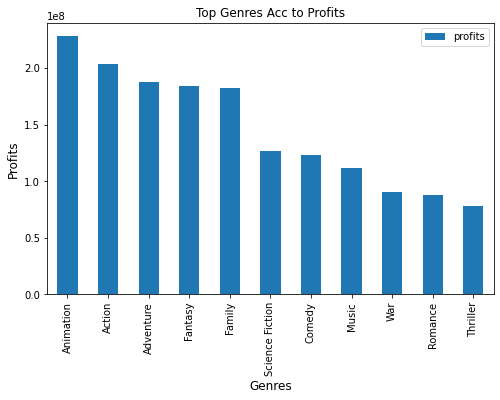

In [47]:
top_genres_profits.plot(x='genres', y='profits', kind='bar', figsize=(8,5))
plt.title('Top Genres Acc to Profits')
plt.xlabel('Genres', size=12)
plt.ylabel('Profits', size=12);

#### Conclusion: Top Genres for making most profits are animation, action and adventure.

### Research Question 4  (Quantity of movies through the years)

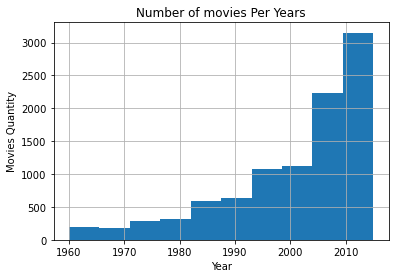

In [65]:
df.release_year.hist()
plt.title('Number of movies Per Years')
plt.xlabel('Year')
plt.ylabel('Movies Quantity');

#### The year's histogram is skewed to the left. There are more movies produced in the recent years.

## Conclusions
#### Christopher Nolan has the highes vote rate and James Cameron has the highest revenue.
#### Warner Bros and Universal Pictures are the most production companies making profits.
#### There's positive corellation between budget and revenue.
#### Top Genres for making most profits are animation, action and adventure.
#### There are more movies produced in the recent years.


### Data Limitation:
##### The data provide information about movies produced only until 2015, so it's not updated.
##### The number of missing values in revenue and budget in the form of zeros is very significant, and affecting the data analysis.
##### There's another way to evaluate how a movie was successful is by adding the nomination or winning for Oscar or Amy prizes, etc.